In [117]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importante para la actividad
import seaborn as sns

In [118]:
#lA FUNCION HEADER ES PARA LEER LOS PRIMEROS DOS RENGLOPNES COMO EL TITULO DE LA COLUMNA
df0 = pd.read_csv('meteo-nogal-09.csv',engine='python')
df1 = pd.read_csv('soil-nogal-09.csv',engine='python')
pd.options.display.max_rows = 10000
#pd.options.display.max_columns = 100

In [119]:
#Borra las columas que no son necesarias
df1.drop(df1.columns[4:12], axis=1, inplace=True)
df1.drop(df1.columns[12:121], axis=1, inplace=True)
df1.drop(df1.columns[[0]], axis=1, inplace=True)

In [120]:
df1['3 Day_RTM  L'] = pd.to_datetime(df1['3 Day_RTM  L'], format='%j').dt.strftime('%m-%d')

In [121]:
df1["4 Hour_Minute_RTM  L"] = df1["4 Hour_Minute_RTM  L"].astype(str).replace(regex={r"00$":r":00" , r"30$":r":30" , r"^:30":r"0:30" , r"24:00":r"00:00:01"})

In [122]:
df1['2 Year_RTM  L'] = df1['2 Year_RTM  L'].astype('str') 

In [123]:
df1["FECHA"] = df1["2 Year_RTM  L"] + "-" + df1["3 Day_RTM  L"] + " " + df1["4 Hour_Minute_RTM  L"]

In [124]:
df1['FECHA'] = df1["FECHA"].astype('datetime64[ns]')

In [125]:
#RESETEA EL INDICE
df0 = df0.drop(df0.index[0]).reset_index(drop=True)

In [126]:
#Borra las columas que no son necesarias
df0.drop(df0.columns[18:36], axis=1, inplace=True)
df0.drop(df0.columns[2:4], axis=1, inplace=True)

In [127]:
#JUNTAS ESTAS DOS COLUMAS PARA CREAR UNA SOLA COLUMA TIEMPO
df0['FECHA'] = df0['DATE'] + ' ' + df0['TIME']
df0.drop(['DATE', 'TIME'], axis=1 , inplace=True)

In [128]:
#CONVERTIR TODAS LAS COLUMAS EN TIPO NUMERIC
#df0 = df0.apply(pd.to_numeric, errors='coerce')

In [129]:
df0['FECHA'] = df0["FECHA"].astype('datetime64[ns]')

In [130]:
df0["FECHA"] = df0["FECHA"].astype(str).replace(regex={r"00:00:00$":r"00:00:01"})

In [131]:
df0['FECHA'] = df0["FECHA"].astype('datetime64[ns]')

In [132]:
df2 = pd.merge(df0, df1, on='FECHA')

In [133]:
#Borra las columas que no son necesarias
df2.drop(df2.columns[0:9], axis=1, inplace=True)
df2.drop(df2.columns[1:5], axis=1, inplace=True)

In [134]:
df2.dtypes

airT_Avg                        object
FECHA                   datetime64[ns]
2 Year_RTM  L                   object
3 Day_RTM  L                    object
4 Hour_Minute_RTM  L            object
Tsuelo_10cm                    float64
Tsuelo_20cm                    float64
Tsuelo_30cm                    float64
Tsuelo_40cm                    float64
Tsuelo_55cm                    float64
Tsuelo_70cm                    float64
Tsuelo_85cm                    float64
Tsuelo_100cm                   float64
dtype: object

In [136]:
df2["airT_Avg"] = pd.to_numeric(df2["airT_Avg"])

In [137]:
#Seleccionar un día de Enero, y graficar la temperatura del aire, y las 4 temperaturas del subsuelo.(10,20,40,85)
df3 = df2[ df2["3 Day_RTM  L"] == "01-27"]

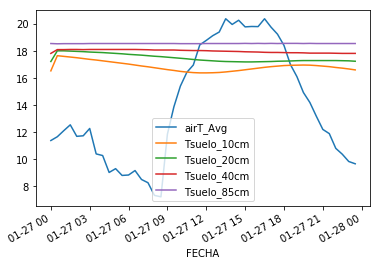

In [141]:
df3.plot(x="FECHA", y=["airT_Avg", "Tsuelo_10cm" , "Tsuelo_20cm" , "Tsuelo_40cm" , "Tsuelo_85cm"])
plt.show()